# **Install and Import Libraries**

In [ ]:
!pip install pandas-profiling
!pip install scikit-learn==1.2.2
!pip install lightgbm catboost
!pip install streamlit==1.30.0
!pip install numpy==1.24.0
!pip install python-dotenv==1.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 93.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.30.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.3 which is incompatible.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.3 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
langchain 0.3.18 requires numpy<2,>=1.26.4; python_version < "3.12", but you have numpy 2.2.3 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.2.3 which is 

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import streamlit as st

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
original_data = pd.read_csv('/content/drive/MyDrive/Data/Cars_Data.csv')
original_data.head(20)

,price,brand,model,color,registration_date,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km.1,mileage_in_km
0,2013796,ford,Kuga,black,01-05-23,140,190,Automatic,Hybrid,5.4,100
1,604557,hyundai,i10,black,01-09-18,49,67,Manual,Petrol,4.6,27782
2,1281316,honda,CR-V,red,01-07-18,114,155,Automatic,Petrol,7.5,57000
3,1830676,kia,Sportage,black,01-02-23,110,150,Manual,Petrol,5.9,7500
4,303456,honda,Civic,black,01-09-09,103,140,Manual,Petrol,6.7,160000
5,2950324,hyundai,STARIA,white,01-01-23,130,177,Automatic,Diesel,8.9,499
6,977860,hyundai,KONA,red,01-05-19,88,120,Manual,Petrol,5.4,64300
7,277296,ford,Fiesta,white,01-09-12,60,82,Manual,Petrol,5.6,105000
8,936528,dacia,Sandero,grey,01-10-22,67,91,Manual,Petrol,5.0,50
9,1383864,audi,A5,blue,01-05-19,110,150,Automatic,Diesel,4.6,133000


In [ ]:
data = original_data.copy()

In [ ]:
data

,price,brand,model,color,registration_date,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km.1,mileage_in_km
0,2013796,ford,Kuga,black,01-05-23,140,190,Automatic,Hybrid,5.4,100
1,604557,hyundai,i10,black,01-09-18,49,67,Manual,Petrol,4.6,27782
2,1281316,honda,CR-V,red,01-07-18,114,155,Automatic,Petrol,7.5,57000
3,1830676,kia,Sportage,black,01-02-23,110,150,Manual,Petrol,5.9,7500
4,303456,honda,Civic,black,01-09-09,103,140,Manual,Petrol,6.7,160000
...,...,...,...,...,...,...,...,...,...,...,...
77114,659179,audi,A1,blue,01-05-12,90,122,Manual,Petrol,5.3,148000
77115,523147,fiat,500,black,01-12-19,51,69,Automatic,Petrol,5.2,31698
77116,1297536,honda,CR-V,brown,01-01-19,127,173,Manual,Petrol,6.3,77900
77117,1202836,alfa-romeo,Giulietta,grey,01-12-20,125,170,Automatic,Diesel,5.5,52251


In [ ]:
data["brand"].unique()

array(['ford', 'hyundai', 'honda', 'kia', 'dacia', 'audi', 'alfa-romeo',
       'bmw', 'land-rover', 'jaguar', 'fiat', 'lamborghini', 'mazda',
       'citroen', 'isuzu', 'jeep', 'bentley', 'maserati', 'daihatsu',
       'chevrolet', 'aston-martin', 'ferrari', 'dodge', 'chrysler',
       'cadillac', 'daewoo', 'lada', 'infiniti', 'lancia'], dtype=object)

In [ ]:
data["model"].unique()

array(['Kuga', 'i10', 'CR-V', 'Sportage', 'Civic', 'STARIA', 'KONA',
       'Fiesta', 'Sandero', 'A5', '147', 'A4', 'EcoSport', 'Transit',
       'Q5', 'X5', 'Range Rover Sport', 'XCeed', 'X1', 'TUCSON', 'F-Pace',
       'A6', '730', 'A3', '118', 'Range Rover Evoque', 'A1', 'Optima',
       '550', '114', 'S-Max', 'A8', 'M2', 'Q3', 'Focus', '124 Spider',
       '225', 'Huracan', 'CX-7', 'Stelvio', 'C-Max', '430', 'i40',
       'C5 Aircross', '525', 'D-Max', 'Giulietta', 'X3', 'Duster', 'CX-5',
       'X6', 'Compass', 'CX-3', '500C', 'Edge', 'Logan', 'Tipo', 'RS Q8',
       '535', 'Sorento', 'A4 allroad', 'Aventador', 'Range Rover',
       'Stonic', '500', 'Mondeo', 'M4', 'Renegade', 'i30', '120',
       "Ceed / cee'd", 'Z4', 'i20', 'X3 M', 'X4', '530', '6', 'Q2',
       'Spacetourer', '520', '320', 'TT RS', '135', 'Q7', '318',
       'Continental', 'Ghibli', 'Mulsanne', 'TT', '420', 'Dokker',
       'Grand Cherokee', 'Rio', 'Tourneo Custom', 'Ducato', 'Picanto',
       '116', 'A6 allroa

In [ ]:
data["color"].unique()

array(['black', 'red', 'white', 'grey', 'blue', 'silver', 'brown',
       'green', 'orange', 'gold', 'yellow', 'violet', 'bronze', 'beige'],
      dtype=object)

In [ ]:
data["transmission_type"].unique()

array(['Automatic', 'Manual', 'Unknown', 'Semi-automatic'], dtype=object)

In [ ]:
data = data[data['transmission_type'] != 'Unknown']
data["transmission_type"].unique()

array(['Automatic', 'Manual', 'Semi-automatic'], dtype=object)

In [ ]:
data["fuel_type"].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'Electric'], dtype=object)

# **Analysis and Data Cleaning**

In [ ]:
data.shape

(76784, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76784 entries, 0 to 77118
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       76784 non-null  int64  
 1   brand                       76784 non-null  object 
 2   model                       76784 non-null  object 
 3   color                       76784 non-null  object 
 4   registration_date           76784 non-null  object 
 5   power_kw                    76784 non-null  int64  
 6   power_ps                    76784 non-null  int64  
 7   transmission_type           76784 non-null  object 
 8   fuel_type                   76784 non-null  object 
 9   fuel_consumption_l_100km.1  76784 non-null  float64
 10  mileage_in_km               76784 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 7.0+ MB


In [ ]:
data.describe().round(2)

,price,power_kw,power_ps,fuel_consumption_l_100km.1,mileage_in_km
count,76784.00,76784.00,76784.00,76784.00,76784.00
mean,1499463.47,136.53,185.71,7.07,82088.01
std,2067665.57,78.90,107.25,20.12,76105.82
min,13080.00,6.00,8.00,0.00,0.00
25%,680107.00,88.00,120.00,5.00,24643.00
50%,1072507.00,110.00,150.00,5.80,65868.00
75%,1673716.00,150.00,204.00,6.90,121208.25
max,61214400.00,735.00,999.00,739.00,3800000.00


In [ ]:
data['registration_date'] = pd.to_datetime(data['registration_date'], format='%d-%m-%y', errors='coerce')

In [ ]:
current_year = datetime.now().year
data['vehicle_age'] = current_year - data['registration_date'].dt.year
data['vehicle_age']

,vehicle_age
0,2
1,7
2,7
3,2
4,16
...,...
77114,13
77115,6
77116,6
77117,5


In [ ]:
data.drop(columns=['registration_date'], inplace=True)

In [ ]:
data.head()

,price,brand,model,color,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km.1,mileage_in_km,vehicle_age
0,2013796,ford,Kuga,black,140,190,Automatic,Hybrid,5.4,100,2
1,604557,hyundai,i10,black,49,67,Manual,Petrol,4.6,27782,7
2,1281316,honda,CR-V,red,114,155,Automatic,Petrol,7.5,57000,7
3,1830676,kia,Sportage,black,110,150,Manual,Petrol,5.9,7500,2
4,303456,honda,Civic,black,103,140,Manual,Petrol,6.7,160000,16


In [ ]:
data=data[data["mileage_in_km"]>0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76687 entries, 0 to 77118
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       76687 non-null  int64  
 1   brand                       76687 non-null  object 
 2   model                       76687 non-null  object 
 3   color                       76687 non-null  object 
 4   power_kw                    76687 non-null  int64  
 5   power_ps                    76687 non-null  int64  
 6   transmission_type           76687 non-null  object 
 7   fuel_type                   76687 non-null  object 
 8   fuel_consumption_l_100km.1  76687 non-null  float64
 9   mileage_in_km               76687 non-null  int64  
 10  vehicle_age                 76687 non-null  int32  
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 6.7+ MB


In [ ]:
data.duplicated().sum()

2789

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(73898, 11)

In [ ]:
data.insert(0, "ID", range(1, len(data) + 1))

In [ ]:
data.shape

(73898, 12)

In [ ]:
data.isnull().sum()

,0
ID,0
price,0
brand,0
model,0
color,0
power_kw,0
power_ps,0
transmission_type,0
fuel_type,0
fuel_consumption_l_100km.1,0


In [ ]:
for col in data.columns:
    print(col," : ",data[col].nunique())

ID  :  73898
price  :  10179
brand  :  29
model  :  510
color  :  14
power_kw  :  399
power_ps  :  399
transmission_type  :  3
fuel_type  :  4
fuel_consumption_l_100km.1  :  312
mileage_in_km  :  28841
vehicle_age  :  29


In [ ]:
categorical_columns = ['brand', 'model', 'color', 'transmission_type', 'fuel_type']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data_encoded

,ID,price,power_kw,power_ps,fuel_consumption_l_100km.1,mileage_in_km,vehicle_age,brand_aston-martin,brand_audi,brand_bentley,...,color_red,color_silver,color_violet,color_white,color_yellow,transmission_type_Manual,transmission_type_Semi-automatic,fuel_type_Electric,fuel_type_Hybrid,fuel_type_Petrol
0,1,2013796,140,190,5.4,100,2,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2,604557,49,67,4.6,27782,7,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,3,1281316,114,155,7.5,57000,7,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,4,1830676,110,150,5.9,7500,2,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,5,303456,103,140,6.7,160000,16,False,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77114,73894,659179,90,122,5.3,148000,13,False,True,False,...,False,False,False,False,False,True,False,False,False,True
77115,73895,523147,51,69,5.2,31698,6,False,False,False,...,False,False,False,False,False,False,False,False,False,True
77116,73896,1297536,127,173,6.3,77900,6,False,False,False,...,False,False,False,False,False,True,False,False,False,True
77117,73897,1202836,125,170,5.5,52251,5,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
datanumeric=data.select_dtypes(exclude='object')
correlation_matrix = datanumeric.corr()
print(correlation_matrix)

                                  ID     price  power_kw  power_ps  \
ID                          1.000000  0.000628  0.005505  0.005507   
price                       0.000628  1.000000  0.674640  0.674669   
power_kw                    0.005505  0.674640  1.000000  0.999996   
power_ps                    0.005507  0.674669  0.999996  1.000000   
fuel_consumption_l_100km.1  0.009202  0.067237  0.091415  0.091436   
mileage_in_km               0.011221 -0.292310 -0.059047 -0.059006   
vehicle_age                 0.017022 -0.299277 -0.099665 -0.099641   

                            fuel_consumption_l_100km.1  mileage_in_km  \
ID                                            0.009202       0.011221   
price                                         0.067237      -0.292310   
power_kw                                      0.091415      -0.059047   
power_ps                                      0.091436      -0.059006   
fuel_consumption_l_100km.1                    1.000000      -0.039070   
m

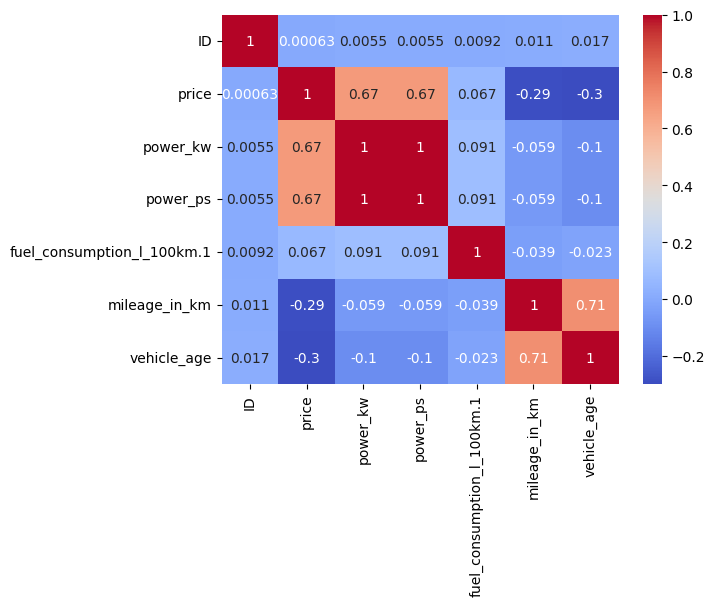

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
data.drop(columns=['power_kw'], inplace=True)

In [ ]:
datanumeric=data.select_dtypes(exclude='object')
correlation_matrix = datanumeric.corr()
print(correlation_matrix)

                                  ID     price  power_ps  \
ID                          1.000000  0.000628  0.005507   
price                       0.000628  1.000000  0.674669   
power_ps                    0.005507  0.674669  1.000000   
fuel_consumption_l_100km.1  0.009202  0.067237  0.091436   
mileage_in_km               0.011221 -0.292310 -0.059006   
vehicle_age                 0.017022 -0.299277 -0.099641   

                            fuel_consumption_l_100km.1  mileage_in_km  \
ID                                            0.009202       0.011221   
price                                         0.067237      -0.292310   
power_ps                                      0.091436      -0.059006   
fuel_consumption_l_100km.1                    1.000000      -0.039070   
mileage_in_km                                -0.039070       1.000000   
vehicle_age                                  -0.023161       0.708780   

                            vehicle_age  
ID                       

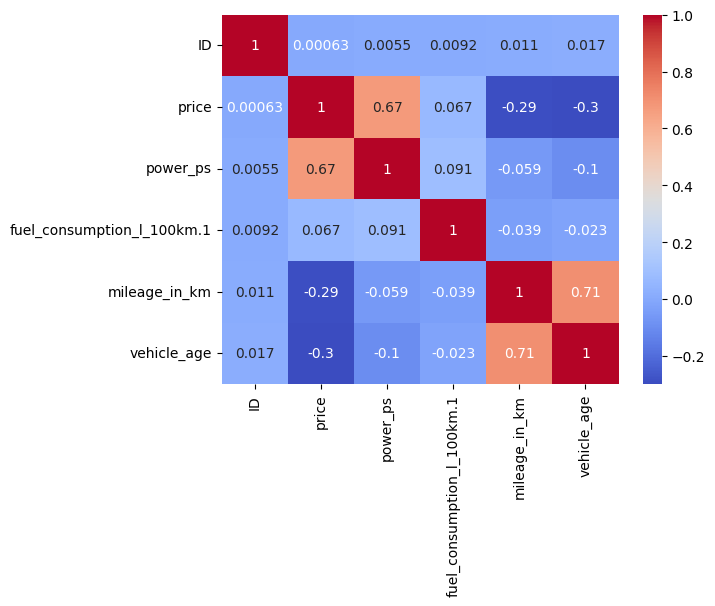

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
top10cars=data["brand"].value_counts().sort_values().nlargest(10)
top10cars

,count
brand,
audi,16208
ford,14530
bmw,14075
hyundai,5065
kia,4422
fiat,3501
citroen,2872
land-rover,2569
dacia,2216


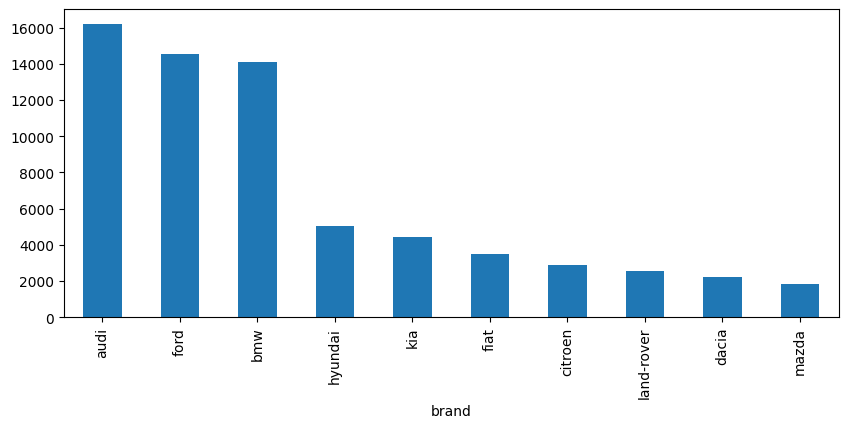

Text(0.5, 1.0, 'Top 10 Brands')

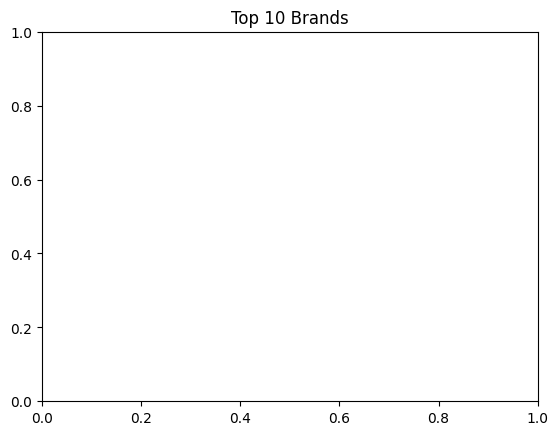

In [ ]:
top10cars.plot(figsize=(10,4),kind="bar")
plt.show()
plt.title("Top 10 Brands")

In [ ]:
top_10_mean_price=[data[data['brand']==i]["price"].mean() for i in list(top10cars.index)]
top_10_mean_price

[1503370.4102912142,
 1033492.1657949071,
 1326172.534991119,
 1018489.2653504442,
 1158655.0343735865,
 774957.0605541274,
 940116.5919220055,
 3056445.0027247956,
 741396.4837545126,
 914955.3196721311]

<BarContainer object of 10 artists>

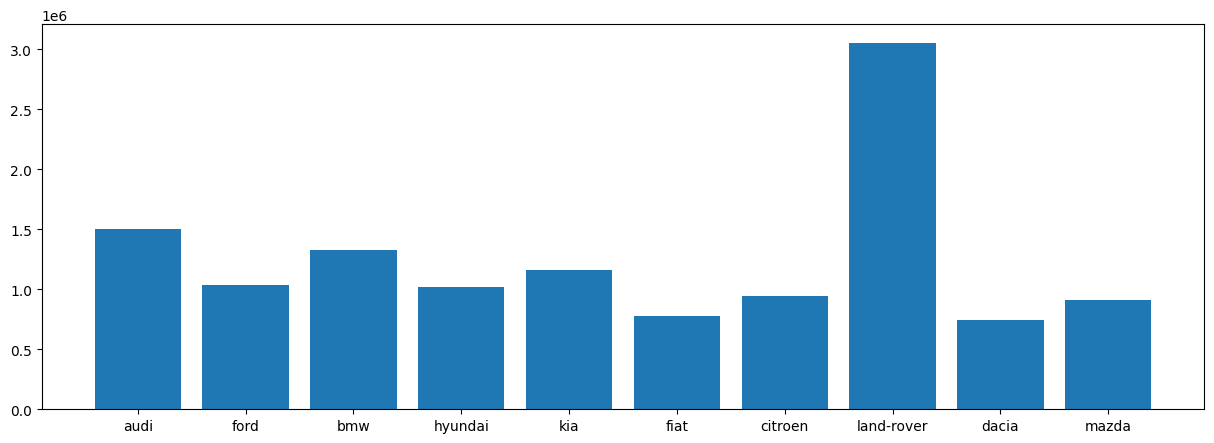

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(top10cars.index,top_10_mean_price)

In [ ]:
data_object=data.select_dtypes(include='object')
data_object.head()

,brand,model,color,transmission_type,fuel_type
0,ford,Kuga,black,Automatic,Hybrid
1,hyundai,i10,black,Manual,Petrol
2,honda,CR-V,red,Automatic,Petrol
3,kia,Sportage,black,Manual,Petrol
4,honda,Civic,black,Manual,Petrol


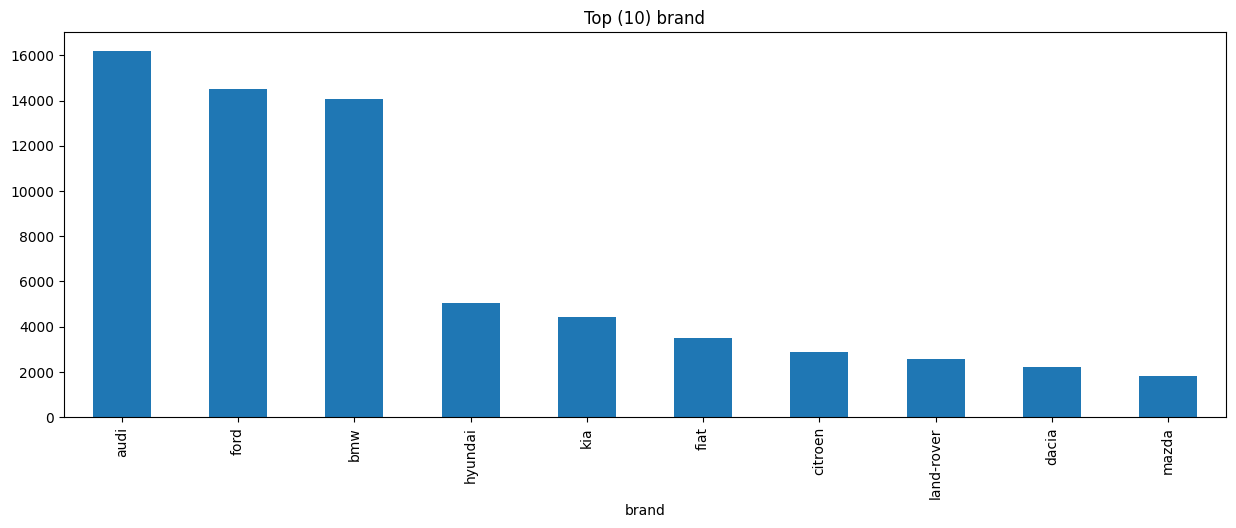

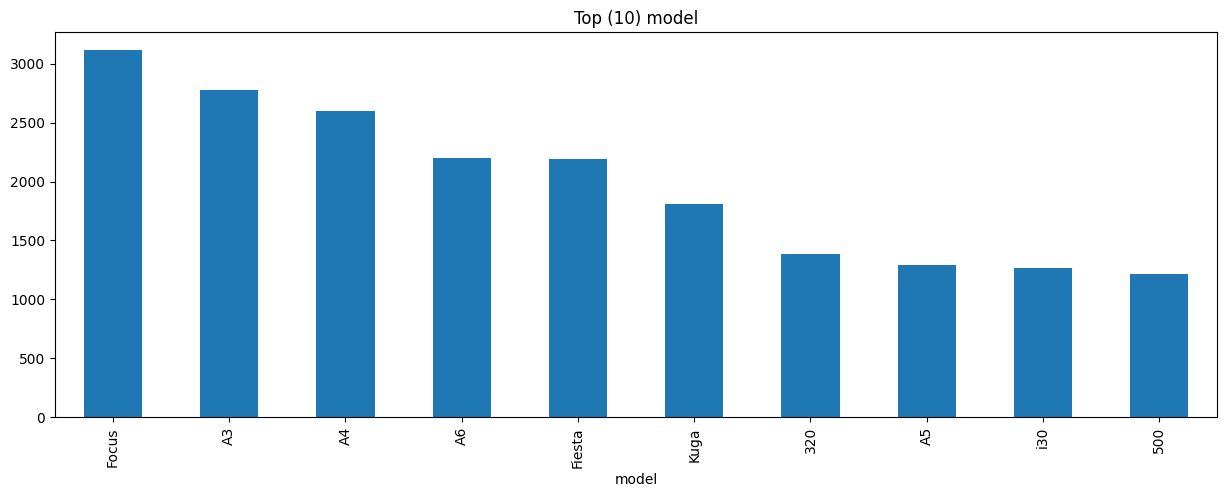

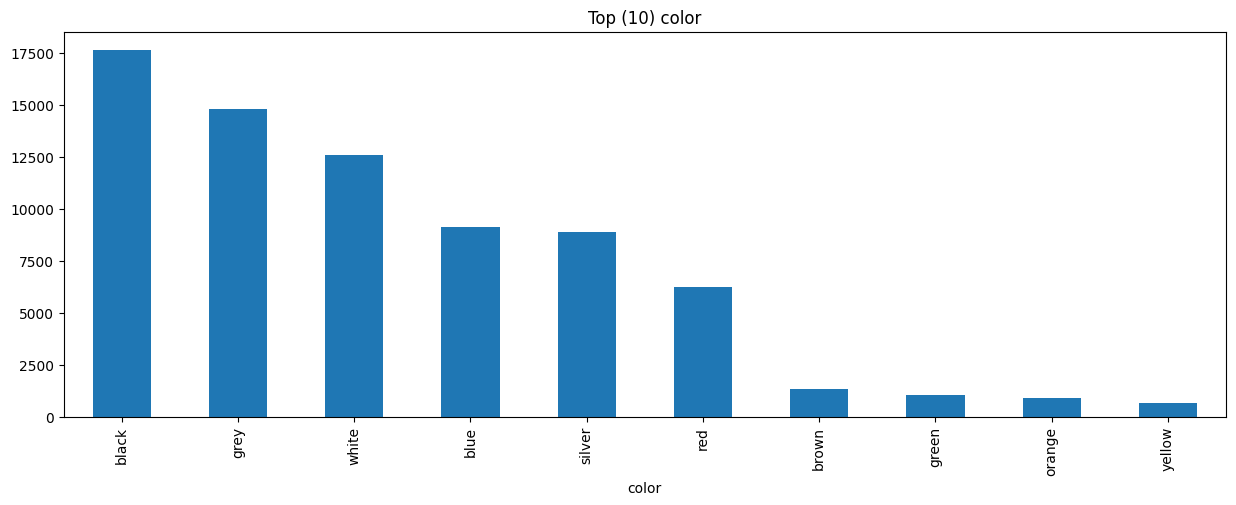

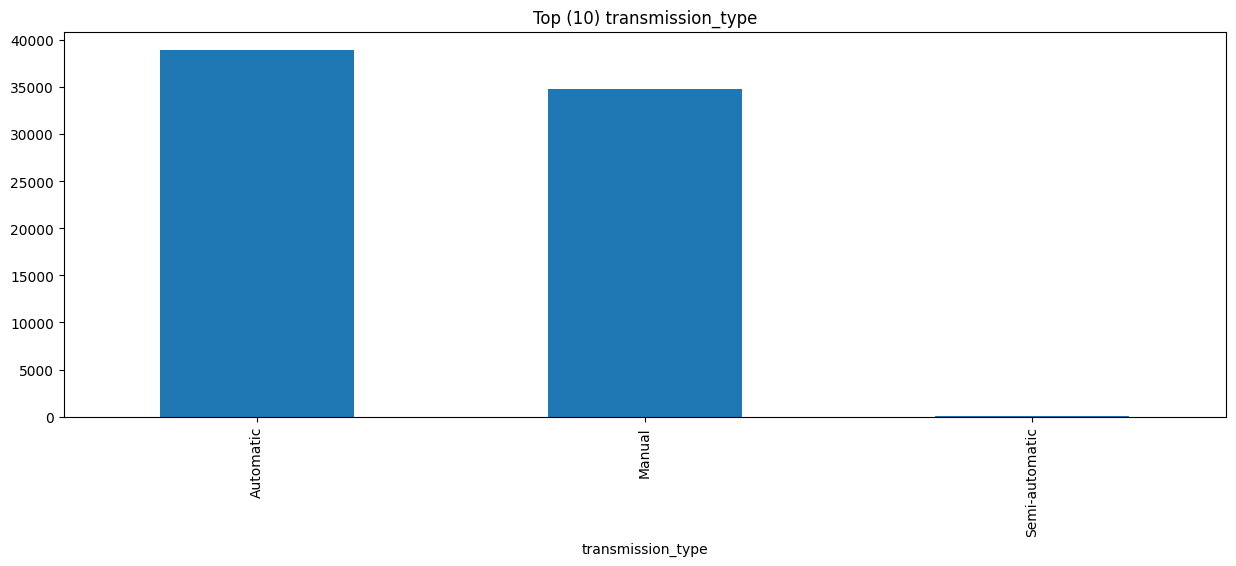

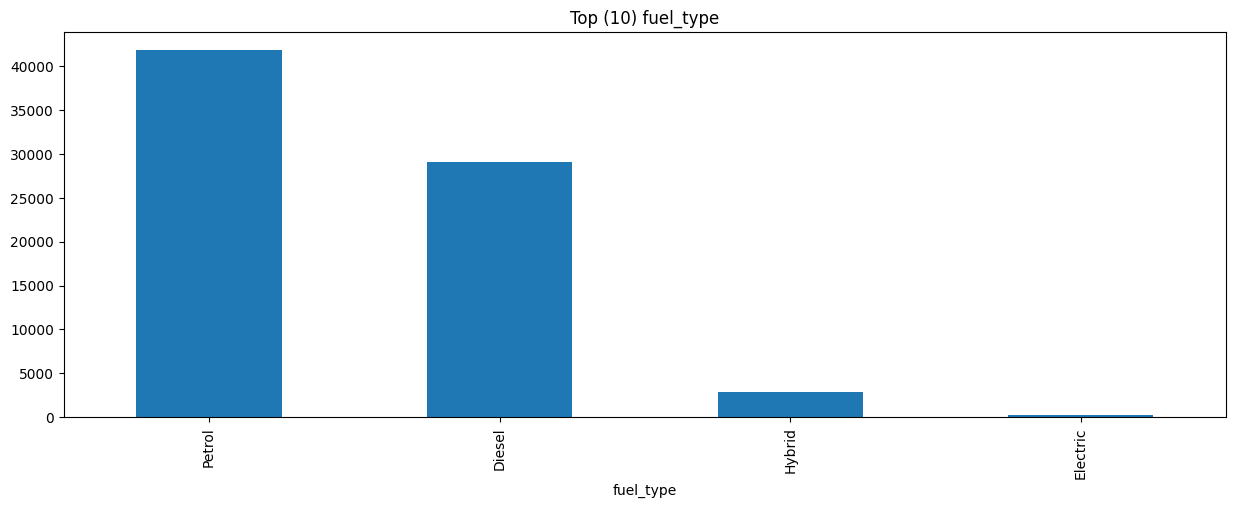

In [ ]:
for col in data_object.columns:
    plt.figure(figsize=(15,5))
    top10=data[col].value_counts().nlargest(10)
    top10.plot(kind="bar")
    plt.title("Top (10)"+" "+col)
    plt.show()


In [ ]:
data.head()

,ID,price,brand,model,color,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km.1,mileage_in_km,vehicle_age
0,1,2013796,ford,Kuga,black,190,Automatic,Hybrid,5.4,100,2
1,2,604557,hyundai,i10,black,67,Manual,Petrol,4.6,27782,7
2,3,1281316,honda,CR-V,red,155,Automatic,Petrol,7.5,57000,7
3,4,1830676,kia,Sportage,black,150,Manual,Petrol,5.9,7500,2
4,5,303456,honda,Civic,black,140,Manual,Petrol,6.7,160000,16


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73898 entries, 0 to 77118
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          73898 non-null  int64  
 1   price                       73898 non-null  int64  
 2   brand                       73898 non-null  object 
 3   model                       73898 non-null  object 
 4   color                       73898 non-null  object 
 5   power_ps                    73898 non-null  int64  
 6   transmission_type           73898 non-null  object 
 7   fuel_type                   73898 non-null  object 
 8   fuel_consumption_l_100km.1  73898 non-null  float64
 9   mileage_in_km               73898 non-null  int64  
 10  vehicle_age                 73898 non-null  int32  
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 6.5+ MB


In [ ]:
data=data.drop(["ID"],axis=1)
data.head()

,price,brand,model,color,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km.1,mileage_in_km,vehicle_age
0,2013796,ford,Kuga,black,190,Automatic,Hybrid,5.4,100,2
1,604557,hyundai,i10,black,67,Manual,Petrol,4.6,27782,7
2,1281316,honda,CR-V,red,155,Automatic,Petrol,7.5,57000,7
3,1830676,kia,Sportage,black,150,Manual,Petrol,5.9,7500,2
4,303456,honda,Civic,black,140,Manual,Petrol,6.7,160000,16


In [ ]:
data.shape
# data shape after data cleaning

(73898, 10)

# **Detect the outliers**

<Axes: ylabel='price'>

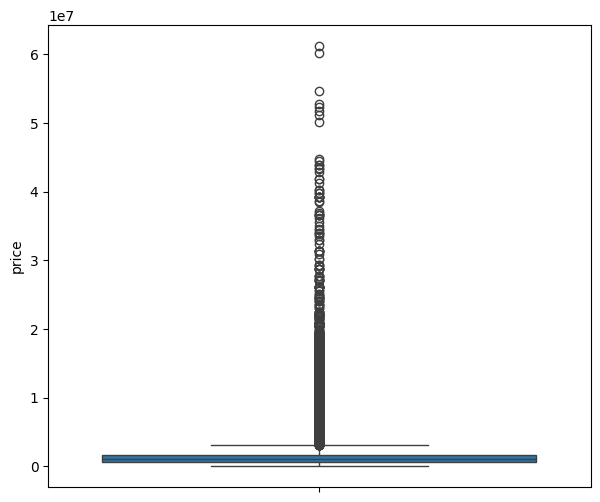

In [ ]:
plt.subplots(figsize=(7, 6))
sns.boxplot( data=data['price'])

In [ ]:
data_numeric= data.select_dtypes(exclude="object")

for col in data_numeric.columns:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    outliers=((data_numeric[col]>ub)| (data_numeric[col]<lb)).sum()
    total=data_numeric[col].shape[0]
    print(f"Total outliers in {col} are : {outliers} and percentage is:{round(100*outliers/total,2)}%")
    if outliers>0:
       data= data.loc[(data[col]<=ub) & (data[col]>=lb)]


Total outliers in price are : 4860 and percentage is:6.58%
Total outliers in power_ps are : 8345 and percentage is:11.29%
Total outliers in fuel_consumption_l_100km.1 are : 8106 and percentage is:10.97%
Total outliers in mileage_in_km are : 1703 and percentage is:2.3%
Total outliers in vehicle_age are : 1980 and percentage is:2.68%


<Axes: ylabel='price'>

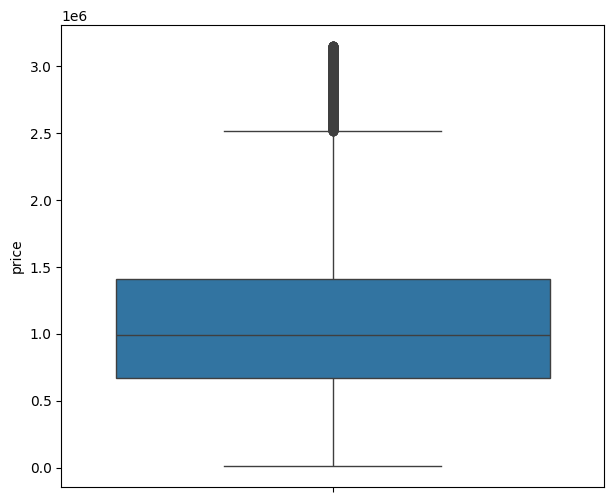

In [ ]:
plt.subplots(figsize=(7, 6))
sns.boxplot( data=data['price'])

<Axes: ylabel='mileage_in_km'>

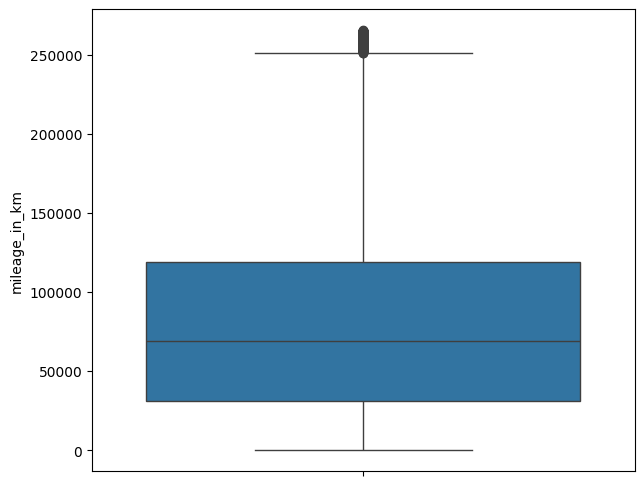

In [ ]:
plt.subplots(figsize=(7, 6))
sns.boxplot( data=data['mileage_in_km'])

<Axes: ylabel='vehicle_age'>

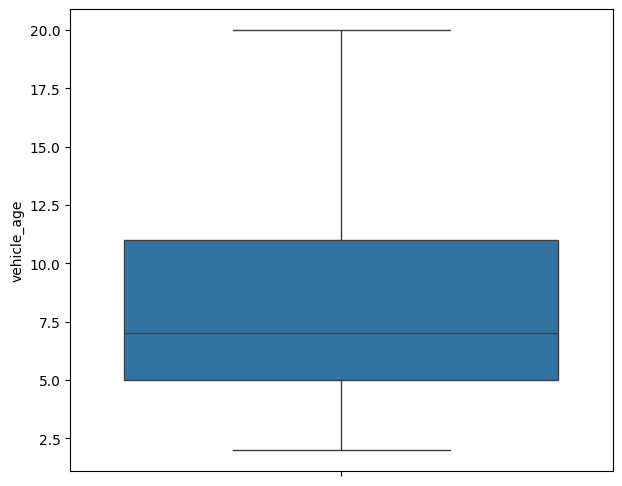

In [ ]:
plt.subplots(figsize=(7, 6))
sns.boxplot( data=data['vehicle_age'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58474 entries, 0 to 77118
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       58474 non-null  int64  
 1   brand                       58474 non-null  object 
 2   model                       58474 non-null  object 
 3   color                       58474 non-null  object 
 4   power_ps                    58474 non-null  int64  
 5   transmission_type           58474 non-null  object 
 6   fuel_type                   58474 non-null  object 
 7   fuel_consumption_l_100km.1  58474 non-null  float64
 8   mileage_in_km               58474 non-null  int64  
 9   vehicle_age                 58474 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 4.7+ MB


In [ ]:
data

,price,brand,model,color,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km.1,mileage_in_km,vehicle_age
0,2013796,ford,Kuga,black,190,Automatic,Hybrid,5.4,100,2
1,604557,hyundai,i10,black,67,Manual,Petrol,4.6,27782,7
2,1281316,honda,CR-V,red,155,Automatic,Petrol,7.5,57000,7
3,1830676,kia,Sportage,black,150,Manual,Petrol,5.9,7500,2
4,303456,honda,Civic,black,140,Manual,Petrol,6.7,160000,16
...,...,...,...,...,...,...,...,...,...,...
77114,659179,audi,A1,blue,122,Manual,Petrol,5.3,148000,13
77115,523147,fiat,500,black,69,Automatic,Petrol,5.2,31698,6
77116,1297536,honda,CR-V,brown,173,Manual,Petrol,6.3,77900,6
77117,1202836,alfa-romeo,Giulietta,grey,170,Automatic,Diesel,5.5,52251,5


# **Data Preprocessing and Transformation**

In [ ]:
dobject=data.select_dtypes(include='object')
dnumeric=data.select_dtypes(exclude='object')

In [ ]:
la=LabelEncoder()

In [ ]:
for i in range(0,dobject.shape[1]):
    dobject.iloc[:,i]=la.fit_transform(dobject.iloc[:,i])

In [ ]:
data = pd.concat([dobject, dnumeric], axis=1)

<Axes: >

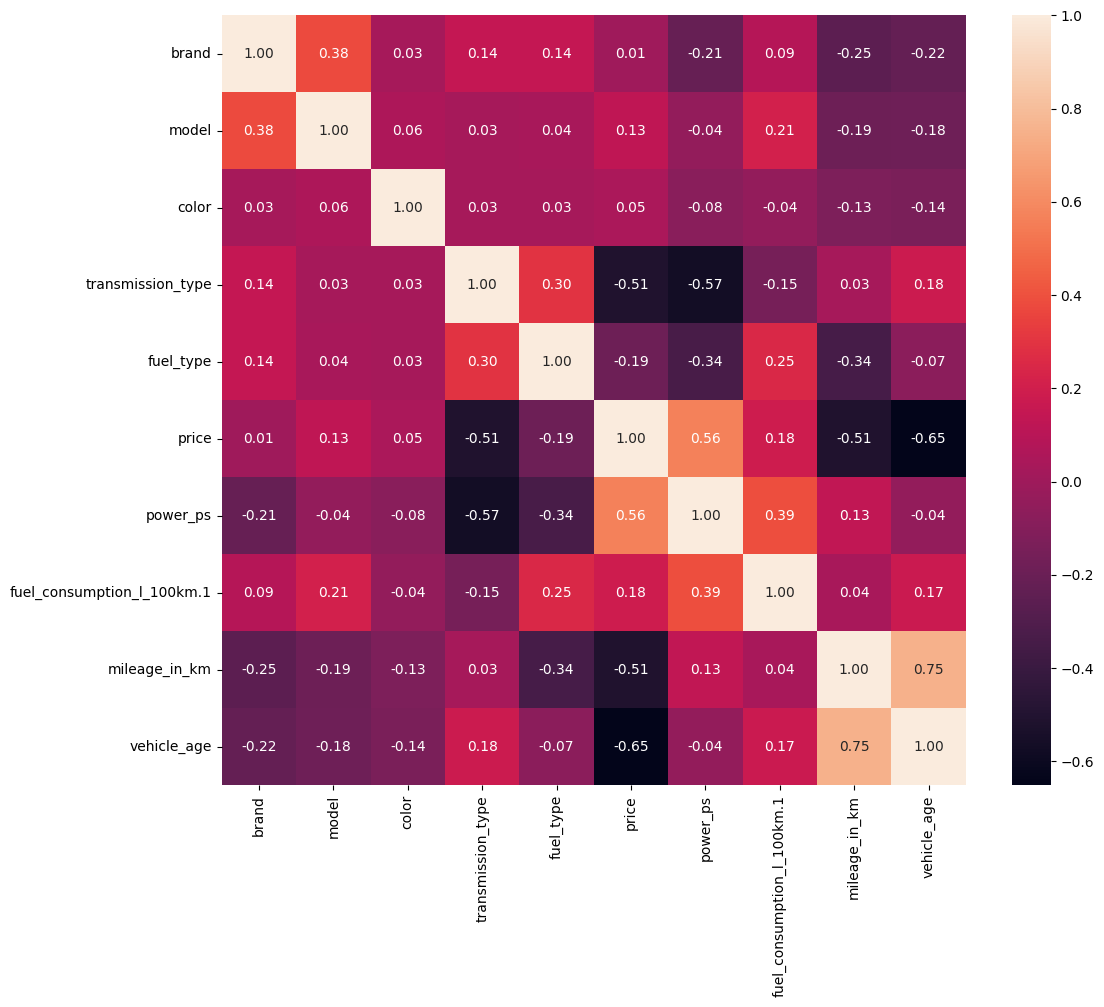

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,fmt='.2f')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58474 entries, 0 to 77118
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   brand                       58474 non-null  object 
 1   model                       58474 non-null  object 
 2   color                       58474 non-null  object 
 3   transmission_type           58474 non-null  object 
 4   fuel_type                   58474 non-null  object 
 5   price                       58474 non-null  int64  
 6   power_ps                    58474 non-null  int64  
 7   fuel_consumption_l_100km.1  58474 non-null  float64
 8   mileage_in_km               58474 non-null  int64  
 9   vehicle_age                 58474 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 4.7+ MB


In [ ]:
data.head()

,brand,model,color,transmission_type,fuel_type,price,power_ps,fuel_consumption_l_100km.1,mileage_in_km,vehicle_age
0,11,177,1,0,1,2013796,190,5.4,100,2
1,13,300,1,1,2,604557,67,4.6,27782,7
2,12,95,9,0,2,1281316,155,7.5,57000,7
3,18,246,1,1,2,1830676,150,5.9,7500,2
4,12,108,1,1,2,303456,140,6.7,160000,16


In [ ]:
data

,brand,model,color,transmission_type,fuel_type,price,power_ps,fuel_consumption_l_100km.1,mileage_in_km,vehicle_age
0,11,177,1,0,1,2013796,190,5.4,100,2
1,13,300,1,1,2,604557,67,4.6,27782,7
2,12,95,9,0,2,1281316,155,7.5,57000,7
3,18,246,1,1,2,1830676,150,5.9,7500,2
4,12,108,1,1,2,303456,140,6.7,160000,16
...,...,...,...,...,...,...,...,...,...,...
77114,1,53,2,1,2,659179,122,5.3,148000,13
77115,10,35,1,0,2,523147,69,5.2,31698,6
77116,12,95,4,1,2,1297536,173,6.3,77900,6
77117,0,152,7,0,0,1202836,170,5.5,52251,5


# **MODEL**

In [ ]:
numerical_columns = ['power_ps', 'fuel_consumption_l_100km.1', 'mileage_in_km', 'vehicle_age']
scaler2 = StandardScaler()
data_encoded[numerical_columns] = scaler2.fit_transform(data_encoded[numerical_columns])

In [ ]:
data_encoded

,ID,price,power_kw,power_ps,fuel_consumption_l_100km.1,mileage_in_km,vehicle_age,brand_aston-martin,brand_audi,brand_bentley,...,color_red,color_silver,color_violet,color_white,color_yellow,transmission_type_Manual,transmission_type_Semi-automatic,fuel_type_Electric,fuel_type_Hybrid,fuel_type_Petrol
0,1,2013796,140,0.027305,-0.083413,-1.107977,-1.312708,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2,604557,49,-1.113806,-0.122525,-0.744438,-0.296865,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,3,1281316,114,-0.297402,0.019256,-0.360726,-0.296865,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,4,1830676,110,-0.343788,-0.058968,-1.010795,-1.312708,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,5,303456,103,-0.436562,-0.019856,0.991944,1.531653,False,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77114,73894,659179,90,-0.603553,-0.088302,0.834351,0.922147,False,True,False,...,False,False,False,False,False,True,False,False,False,True
77115,73895,523147,51,-1.095252,-0.093191,-0.693010,-0.500034,False,False,False,...,False,False,False,False,False,False,False,False,False,True
77116,73896,1297536,127,-0.130410,-0.039412,-0.086252,-0.500034,False,False,False,...,False,False,False,False,False,True,False,False,False,True
77117,73897,1202836,125,-0.158242,-0.078524,-0.423093,-0.703203,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

In [ ]:
expected_columns2 = list(X.columns)
joblib.dump(expected_columns2, "/content/drive/MyDrive/Data/expected_columns2.pkl")
joblib.dump(scaler2, "/content/drive/MyDrive/Data/scaler2.pkl")
print("Saved expected_columns and scaler.")

Saved expected_columns and scaler.


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (59118, 561), Testing set: (14780, 561)


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(silent=True),
    'SVR': SVR(kernel='rbf'),
    'DecisionTreeRegressor': DecisionTreeRegressor(max_depth=5, random_state=42),
}


results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'MSE': mse, 'R^2': r2}
    print(f"Training {name} Done")

Training Linear Regression...
Training Linear Regression Done
Training XGBoost...
Training XGBoost Done
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 59118, number of used features: 308
[LightGBM] [Info] Start training from score 1502339.521364
Training LightGBM Done
Training CatBoost...
Training CatBoost Done
Training SVR...
Training SVR Done
Training DecisionTreeRegressor...
Training DecisionTreeRegressor Done


In [ ]:
results_df = pd.DataFrame(results).T
print("\nModel Performance:\n", results_df)


Model Performance:
                                  MAE           MSE       R^2
Linear Regression      316215.896888  7.744577e+11  0.814288
XGBoost                207351.776867  4.183177e+11  0.899689
LightGBM               210917.798767  4.155412e+11  0.900355
CatBoost               199290.197965  3.930641e+11  0.905745
SVR                    825802.857485  4.347694e+12 -0.042558
DecisionTreeRegressor  403549.835634  9.105033e+11  0.781665


In [ ]:
best_model = results_df['MAE'].idxmin()
best_model_score = results_df['MAE'].min()
print(f"\nBest Model: {best_model} with the least MAE: {best_model_score}")


Best Model: CatBoost with the least MAE: 199290.19796472188


In [ ]:
catboost_param_grid = {
    'iterations': [500, 1000, 1500, 2000],
    'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9, 11],
    'border_count': [32, 64, 128, 254],
    'bagging_temperature': [0, 1, 5, 10],
    'random_strength': [1, 5, 10],
    'boosting_type': ['Ordered', 'Plain']
}

catboost_model = CatBoostRegressor(random_seed=42, verbose=0)

catboost_random_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=catboost_param_grid,
    n_iter=20,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("Tuning CatBoost...")
catboost_random_search.fit(X_train, y_train)

Tuning CatBoost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7f9dc4fd1d90>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bagging_temperature': [0, 1, 5, 10],
                                        'boosting_type': ['Ordered', 'Plain'],
                                        'border_count': [32, 64, 128, 254],
                                        'depth': [4, 6, 8, 10],
                                        'iterations': [500, 1000, 1500, 2000],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9, 11],
                                        'learning_rate': [0.005, 0.01, 0.05,
                                                          0.1, 0.2],
                                        'random_strength': [1, 5, 10]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [ ]:
best_catboost_model = catboost_random_search.best_estimator_
print("\nBest Parameters for CatBoost:", catboost_random_search.best_params_)


Best Parameters for Random Forest: {'random_strength': 10, 'learning_rate': 0.2, 'l2_leaf_reg': 7, 'iterations': 2000, 'depth': 8, 'border_count': 64, 'boosting_type': 'Plain', 'bagging_temperature': 1}


In [ ]:
y_pred_cb = best_catboost_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred_cb)
mse = mean_squared_error(y_test, y_pred_cb)
r2 = r2_score(y_test, y_pred_cb)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Model Performance:
Mean Absolute Error (MAE): 183442.24570237883
Mean Squared Error (MSE): 396606828406.57043
R^2 Score: 0.9048954283122007


In [ ]:
best_catboost_model.save_model("/content/drive/MyDrive/Data/best_catboost_model.cbm")